# playground_s5e1

# ライブラリのインポート

In [1]:
%%bash
# pip uninstall lightgbm --yes
# pip install lightgbm \
#     --no-binary lightgbm \
#     --no-cache lightgbm \
#     --config-settings=cmake.define.USE_CUDA=ON

pip install catboost -qq
pip install seaborn_qqplot -qq
pip install japanize-matplotlib optuna mojimoji optuna pymysql -qq
pip install optuna -qq
pip install optuna-integration -qq
pip install category_encoders -qq
pip install skorch -qq
pip install shirokumas -qq
pip install shap -qq
pip install jaconv -qq
pip install hydra-core -qq
pip install pyyaml -qq
# pip install wandb -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.7/205.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import catboost
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import functools
import datetime
from dateutil.parser import parse
import japanize_matplotlib
import optuna
import mojimoji as mjmj
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import category_encoders as ce
from pathlib import Path
import os
import re
import pickle
import math
from math import sqrt
from sklearn import preprocessing
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
import skorch
import torch
from torch import nn
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from skorch import NeuralNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import jaconv
import unicodedata
import hydra
import sys
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from skorch import NeuralNetRegressor
from catboost import CatBoostRegressor
from omegaconf import OmegaConf, DictConfig
import yaml

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 生データのデータフレーム化

In [ ]:
import pandas as pd
base_path = "/content/drive/MyDrive/kaggle/playground_s5e1"
row_tr_df = pd.read_csv(f"{base_path}/data/train.csv")
row_test_df = pd.read_csv(f"{base_path}/data/test.csv")
row_sample_df = pd.read_csv(f"{base_path}/data/sample_submission.csv", header=None)

tr_df = row_tr_df.copy()
test_df = row_test_df.copy()

for col in tr_df.keys():
    col_l = col.lower()
    tr_df.rename(columns={col: col_l}, inplace=True)
    test_df.rename(columns={col: col_l}, inplace=True)

tr_df_cp = tr_df.copy()
test_df_cp = test_df.copy()

# clean clumns

In [ ]:
class load_data_easy_clean():
    """データの前処理に関する関数群"""
    def __init__(self, tr_dir_path=None, test_file_path=None, is_tr_df=True):
        self.tr_dir_path = Path(tr_dir_path)
        self.test_file_path = Path(test_file_path)
        self.drop_cols_list = ['type', 'city_code', 'city', 'zone', 'station', 'tx_circs']
        self.rename_tr_lst = ['id', 'type', 'rigion', 'city_code', 'pref', 'city', 'zone', 'station', 'station_dist',
            'house_layout', 'area', 'land_shape', 'frontage', 'gross_area','constr_year', 'building_struct',
            'building_use', 'future_use', 'f_road_dir', 'f_road_type', 'f_road_width', 'urban_plan',
            'bc_ratio', 'fa_ratio', 'tx_date', 'reno', 'tx_circs', 'log_price']

    #     ['ID', '種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
    #    '最寄駅：距離（分）', '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造',
    #    '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
    #    '容積率（％）', '取引時点', '改装', '取引の事情等']

        self.is_tr_df=is_tr_df

    def merge_tr_data(self, tr_dir_path):
        """複数のファイルがある訓練データがあるファルダからdfを生成"""
        # 複数のファイルがあるファルダに使用
        # フォルダ内のすべてのファイルを取得
        file_list = os.listdir(tr_dir_path)
        file_list.sort()

        # CSVファイルを逐次的に読み込む
        dfs = []  # データフレームを格納するリスト

        for file_name in file_list:
            if file_name.endswith('.csv'):  # 拡張子が.csvの場合のみ処理する
                file_path = os.path.join(tr_dir_path, file_name)
                df = pd.read_csv(file_path, low_memory=False)
                dfs.append(df)

        merge_tr_df = dfs[0]
        for idx in range(1, len(dfs)):
            merge_tr_df = pd.concat([merge_tr_df, dfs[idx]], axis=0)
        merge_tr_df.reset_index(inplace=True, drop=True)
        return merge_tr_df


    def load_test_df(self, test_file_path):
        test_df = pd.read_csv(test_file_path)
        return test_df


    def rename_cols(self, df, rename_tr_lst):
        '''カラム名の分かりやすい名称に変更'''
        cols_lst = df.columns.tolist()
        rename_dict = {}
        for key, val in zip(cols_lst, rename_tr_lst):
            rename_dict[key] = val
        df.rename(columns=rename_dict, inplace=True)
        return df

    def drop_unnecessary_cols(self, tr_df, test_df):

        _tr_cols = tr_df.copy().columns.tolist()
        tr_df.drop(self.drop_cols_list, axis=1, inplace=True)
        tr_df = tr_df.dropna(how='all', axis=1)
        drop_cols = [x for x in _tr_cols if not x in tr_df.columns]
        # tr_dfのcolsに合わせてtest_dfのcolsを整える
        test_df.drop(drop_cols, axis=1, inplace=True)
        # print('after_drop_unnecessary_cols', test_df.shape)
        return (tr_df, test_df)

    def ldks_split(self, ch, num, tmp_dict, tmp_chs):
        """`house_layout`を`layout_l`,`layout_d`,`layout_k`,`layout_s`に分割"""

        if ch == 'L' and 'L' not in tmp_chs:
            tmp_dict['layout_l'].append(num)
        elif ch == 'D' and 'D' not in tmp_chs:
            tmp_dict['layout_d'].append(num)
        elif ch == 'K' and 'K' not in tmp_chs:
            tmp_dict['layout_k'].append(num)
        elif ch == 'S' and 'S' not in tmp_chs:
            tmp_dict['layout_s'].append(num)

    def prepro_cols(self, df):
        df_cols = df.columns.to_list()

        # `id`(ID))の前処理
        if "id" in df_cols:
            df['id'] = df['id'].astype(int)
        # `type`(種類))の前処理
        if "type" in df_cols:
            pass
        # `rigion`(地域))の前処理
        if "rigion" in df_cols:
            pass
        # `city_code`(市区町村コード))の前処理
        if "city_code" in df_cols:
            pass
        # `pref`(都道府県名))の前処理
        if "pref" in df_cols:
            pass
            # 人口密度、平均所得、男女比などに変換する(案)
        # `city`(市区町村名))の前処理
        if "city" in df_cols:
            pass
        # `zone`(地区名))の前処理
        if "zone" in df_cols:
            pass
        # `station`(最寄駅：名称))の前処理
        if "station" in df_cols:
            pass
        # `station_dist`(最寄駅：距離（分）))の前処理
        if "station_dist" in df_cols:
            tmp_rename_map = {"30分?60分": 45, "30分～60分": 45,
                              "1H?1H30": 75, '1H～1H30': 75,
                              "1H30?2H": 90, "1H30～2H": 90,
                              "2H?": 120, "2H～": 120}
            df['station_dist'] = df['station_dist'].replace(tmp_rename_map)
            if self.is_tr_df:
                df.dropna(subset=['station_dist'], axis=0, inplace=True)
            else:
                # print('スイッチはしている')
                tmp_mean = df.dropna(subset=['station_dist'])
                tmp_mean = int(tmp_mean['station_dist'].astype(int).mean())
                df['station_dist'].fillna(tmp_mean, inplace=True)
            df['station_dist'] = df['station_dist'].astype(int)

        # `house_layout`(間取り))の前処理
        if "house_layout" in df_cols:
            if self.is_tr_df:
                df.dropna(subset=['house_layout'], axis=0, inplace=True)
            else:
                df['house_layout'] = df['house_layout'].apply(lambda x: 'None' if pd.isna(x) else x)
            df['house_layout'] = df['house_layout'].apply(lambda x: mjmj.zen_to_han(x) if not pd.isna(x) else x)
            tmp_dict = {'layout_l': [], 'layout_d': [], 'layout_k': [], 'layout_s': []}
            for x in df['house_layout']:
                if pd.isna(x):
                    continue;
                tmp_chs = set()
                pattern = r"(\d)([A-Za-z])"
                _match = re.match(pattern, x)
                if _match:
                    num, ch = _match.groups()
                    self.ldks_split(ch, int(num), tmp_dict, tmp_chs)
                    tmp_chs.add(ch)
                    tmp_txt = x.split(_match.group())[1]
                    for xx in tmp_txt:
                        if xx in {'L', 'D', 'K', 'S'}:
                            self.ldks_split(xx, int(1), tmp_dict, tmp_chs)
                            tmp_chs.add(xx)

                tmp_chs = {'L', 'D', 'K', 'S'}.difference(tmp_chs)
                for ch in tmp_chs:
                    self.ldks_split(ch, int(0), tmp_dict, set())

            tmp_df = pd.DataFrame(tmp_dict)
            df = pd.concat([df, tmp_df],axis=1)
            df['layout_l'].fillna(df['layout_l'].mean(), inplace=True)
            df['layout_d'].fillna(df['layout_d'].mean(), inplace=True)
            df['layout_k'].fillna(df['layout_k'].mean(), inplace=True)
            df['layout_s'].fillna(df['layout_s'].mean(), inplace=True)
            df['layout_l'] = df['layout_l'].astype(int)
            df['layout_d'] = df['layout_d'].astype(int)
            df['layout_k'] = df['layout_k'].astype(int)
            df['layout_s'] = df['layout_s'].astype(int)

        # `area`(面積（㎡）))の前処理
        if "area" in df_cols:
            rename_map = {
                '2000㎡以上': 2000,
                '2,000㎡以上': 2000}
            df['area'].replace(rename_map, inplace=True)
            if self.is_tr_df:
                df.dropna(subset=['area'], axis=0, inplace=True)
            else:
                tmp_mean = df.dropna(subset=['area'])
                tmp_mean = int(tmp_mean['area'].astype(int).mean())
                df['area'].fillna(tmp_mean, inplace=True)
            df["area"] = df["area"].apply(lambda x: int(x))
            # df['area'] = df['area'].astype('int')

        # `land_shape`(土地の形状))の前処理
        if "land_shape" in df_cols:
            pass

        # `frontage`(間口))の前処理
        if "frontage" in df_cols:
            pass

        # `gross_area`(延床面積（㎡）))の前処理
        if "gross_area" in df_cols:
            pass

        # `constr_year`(建築年))の前処理 => # `building_age`(築年数)の生成
        if "constr_year" in df_cols:
            y_map = {}
            num = 0
            year = 0
            for i in df['constr_year'].unique():
                if pd.isna(i):
                    num = i
                    year = float('nan')
                elif "昭和" in i:
                    num = float(i.split('昭和')[1].split('年')[0])
                    year = 98 - num
                elif "平成" in i:
                    num = float(i.split('平成')[1].split('年')[0])
                    year = 35 - num
                elif "令和" in i:
                    num = float(i.split('令和')[1].split('年')[0])
                    year = 5 - num
                elif "戦前" in i:
                    year = 78.0

                y_map[i] = year
            df['building_age'] = df['constr_year'].replace(y_map)
            df = df.drop('constr_year', axis=1)
            if self.is_tr_df:
                df.dropna(subset=['building_age'], axis=0, inplace=True)
            else:
                tmp_mean = df.dropna(subset=['building_age'])
                tmp_mean = int(tmp_mean['building_age'].astype(int).mean())
                df['building_age'].fillna(tmp_mean, inplace=True)
            df['building_age'] = df['building_age'].astype(int)

        # `building_struct`(建物の構造))の前処理
        if "building_struct" in df_cols:
            # pass
            # df['building_struct'] = df['building_struct'].apply(lambda x: mjmj.zen_to_han(x) if not pd.isna(x) else x)
            df['building_struct'] = df['building_struct'].apply(lambda x: 'NaN' if pd.isna(x) else x)
            df['building_struct'] = df['building_struct'].apply(lambda x: mjmj.zen_to_han(x))
            tmp_cols = df['building_struct'].unique().tolist()
            tmp_cols = [x for x in tmp_cols if not x in ['RC', 'SRC']]
            df['building_struct'] = df['building_struct'].replace(tmp_cols, 'その他')

        # `building_use`(用途))の前処理
        if "building_use" in df_cols:
            # pass
            df['building_use'] = df['building_use'].apply(lambda x: 'NaN' if pd.isna(x) else x)
            df['building_use'] = df['building_use'].apply(lambda x: mjmj.zen_to_han(x))
            tmp_lst = df['building_use'].unique().tolist()
            tmp_lst = [x for x in tmp_lst if not x in ['住宅', '事務所', '店舗']]
            df['building_use'].replace(tmp_lst, 'その他', inplace=True)

        # `future_use`(今後の利用目的))の前処理
        if "future_use" in df_cols:
            # pass
            df['future_use'] = df['future_use'].apply(lambda x: 'NaN' if pd.isna(x) else x)
            df['future_use'] = df['future_use'].apply(lambda x: 'その他' if x != '住宅' else x)

        # `f_road_dir`(前面道路：方位))の前処理
        if "f_road_dir" in df_cols:
            pass

        # `f_road_type`(前面道路：種類))の前処理
        if "f_road_type" in df_cols:
            pass

        # `f_road_width`(前面道路：幅員（ｍ）))の前処理
        if "f_road_width" in df_cols:
            pass

        # `urban_plan`(都市計画))の前処理
        if "urban_plan" in df_cols:
            # pass
            df['urban_plan'] = df['urban_plan'].apply(lambda x: 'NaN' if pd.isna(x) else x)
            tmp_lst = df['urban_plan'].value_counts()[df['urban_plan'].value_counts() < 5000].keys().to_list()
            df['urban_plan'].replace(tmp_lst, 'その他', inplace=True)
            df['urban_plan'].replace('None', 'その他', inplace=True)

        # `bc_ratio`(建ぺい率（％）))の前処理
        if "bc_ratio" in df_cols:
            # pass
            if self.is_tr_df:
                # df.drop(df[df['bc_ratio'] == 'None'].index, axis=0, inplace=True)
                df.dropna(subset=['bc_ratio'], axis=0, inplace=True)
            else:
                tmp_mean = df.dropna(subset=['bc_ratio'])
                tmp_mean = int(tmp_mean['bc_ratio'].astype(int).mean())
                df['bc_ratio'].fillna(tmp_mean, inplace=True)
            df['bc_ratio'] = df['bc_ratio'].astype(int)

        # `fa_ratio`(容積率（％）))の前処理
        if "fa_ratio" in df_cols:
            # pass
            if self.is_tr_df:
                # df.drop(df[df['fa_ratio'] == 'None'].index, axis=0, inplace=True)
                df.dropna(subset=['fa_ratio'], axis=0, inplace=True)
            else:
                tmp_mean = df.dropna(subset=['fa_ratio'])
                tmp_mean = int(tmp_mean['fa_ratio'].astype(int).mean())
                df['fa_ratio'].fillna(tmp_mean, inplace=True)
            df['fa_ratio'] = df['fa_ratio'].astype(int)

        # `tx_date`(取引時点))の前処理
        if "tx_date" in df_cols:
            df['tx_date'] = df['tx_date'].apply(lambda x: re.search(r"第(\d+)四半期", x).group(0))

        # `reno`(改装))の前処理
        if "reno" in df_cols:
            # pass
            df['reno'].replace(np.nan, 'NaN', inplace=True)

        # `tx_circs`(取引の事情等))の前処理
        if "tx_circs" in df_cols:
            pass
        # 目的変数`log_price`(取引価格（総額）_log))の前処理

        return df


    def save_prepro_data(self, obj, file_name):
        save_dir = Path('/content/drive/MyDrive/nishika/mansion_winter_2023/data/prepro')
        save_dir.mkdir(parents=True, exist_ok=True)
        save_path = save_dir / f'prepro_{file_name}.pkl'
        with open(save_path, 'wb') as p:
            pickle.dump(obj, p)

    def main_exe(self):
        tr_df = self.merge_tr_data(self.tr_dir_path)
        test_df = self.load_test_df(self.test_file_path)
        rename_test_lst = self.rename_tr_lst.copy()
        rename_test_lst.remove(f'log_price')
        tr_df = self.rename_cols(tr_df, self.rename_tr_lst)
        test_df = self.rename_cols(test_df, rename_test_lst)
        tr_df, test_df = self.drop_unnecessary_cols(tr_df, test_df)
        tr_df = self.prepro_cols(tr_df)
        tr_df.reset_index(inplace=True, drop=True)
        self.is_tr_df = False
        test_df = self.prepro_cols(test_df)
        test_df.reset_index(inplace=True, drop=True)

        # for x in [(tr_df, 'tr_data'), (test_df, 'test_data')]:
        #     self.save_prepro_data(x[0], x[1])

        return (tr_df, test_df)

    def sub_exe(self):
        tr_df = self.merge_tr_data(self.tr_dir_path)
        test_df = self.load_test_df(self.test_file_path)
        rename_test_lst = self.rename_tr_lst.copy()
        rename_test_lst.remove('log_price')
        tr_df = self.rename_cols(tr_df, self.rename_tr_lst)
        test_df = self.rename_cols(test_df, rename_test_lst)

        return (tr_df, test_df)

In [ ]:
tr_dir_path = "/content/drive/MyDrive/nishika/mansion_autumn_2024/data/train"
test_file_path = "/content/drive/MyDrive/nishika/mansion_autumn_2024/data/test.csv"
data_prop = load_data_easy_clean(tr_dir_path=tr_dir_path, test_file_path=test_file_path)
dfs = data_prop.sub_exe()
tr_df = dfs[0]
test_df = dfs[1]

In [ ]:
tr_dir_path = "/content/drive/MyDrive/nishika/mansion_autumn_2024/data/train"
test_file_path = "/content/drive/MyDrive/nishika/mansion_autumn_2024/data/test.csv"
data_prop = load_data_easy_clean(tr_dir_path=tr_dir_path, test_file_path=test_file_path)
dfs = data_prop.main_exe()
tr_df = dfs[0]
test_df = dfs[1]
sample_df = pd.read_csv('/content/drive/MyDrive/nishika/mansion_autumn_2024/data/sample_submission.csv')

# 改定

In [ ]:
def check_na(inp_df):
    df = inp_df.copy()
    for col in df.keys():
        global tmp_df
        print(col)
        tmp_lst = list(df[col].unique())
        tmp_df = pd.DataFrame(tmp_lst)

        if tmp_df.isna().any()[0]:
            print("NaNあり")
            n_nan= df[col].isna().sum()
            print(f"NaNは{n_nan}個あります。")
        else:
            print("NaNなし")
        print("------------------\n")


def check_and_clean_na(inp_df, fill_na=False):
    df = inp_df.copy()
    for col in df.keys():
        global tmp_df
        print(col)
        tmp_lst = list(df[col].unique())
        tmp_df = pd.DataFrame(tmp_lst)

        if tmp_df.isna().any()[0]:
            print("NaNあり")
            if fill_na:
                if isinstance(df[col][0], str):
                    df[col] = df[col].fillna(df[col].mode()[0])
                else:
                    df[col] = df[col].fillna(df[col].mean())
            else:
                df = df.dropna(subset=[col])
        else:
            print("NaNなし")
        print("------------------\n")

    return df

In [ ]:
tr_df = tr_df_cp.copy()
test_df = test_df_cp.copy()

# for col in tr_df:
#     tr_df[col] = tr_df[col].apply(to_half_width).apply(normalize_str)
# for col in test_df:
#     test_df[col] = test_df[col].apply(to_half_width).apply(normalize_str)


# fnc_lst = [clean_age, clean_citytier, clean_durationofpitch, clean_gender, clean_numberoftrips,
#            clean_monthlyincome]
# col_lst = ["age", "citytier", "durationofpitch", "gender", "numberoftrips",
#            "monthlyincome"]

# for col, fnc in zip(col_lst, fnc_lst):
#     tr_df[col] = tr_df[col].apply(fnc)
#     test_df[col] = test_df[col].apply(fnc)

# tr_df = clean_customer_info(tr_df)
# test_df = clean_customer_info(test_df)


# tr_df = clean_productpitched(tr_df)
# test_df = clean_productpitched(test_df)
# tr_df = clean_designation(tr_df)
# test_df = clean_designation(test_df)

tr_df = check_and_clean_na(tr_df).reset_index(drop=True)
test_df = check_and_clean_na(test_df, fill_na=True).reset_index(drop=True)

id
NaNなし
------------------

date
NaNなし
------------------

country
NaNなし
------------------

store
NaNなし
------------------

product
NaNなし
------------------

num_sold
NaNあり
------------------

id
NaNなし
------------------

date
NaNなし
------------------

country
NaNなし
------------------

store
NaNなし
------------------

product
NaNなし
------------------



In [ ]:
def get_binned_data(x, col, bins=10, label_format='{:02}_{:.0f}-{:.0f}'):

    # データ型チェック
    if type(x) not in (pd.Series, pd.DataFrame):
        x = pd.Series(x)

    if x.isnull().values.any():
        print(col)
        print(x.unique())
        raise ValueError(f"{col}にNaNが含まれています。NaNを削除してください。")

    uniq_type = type(x[0])

    # ラベルが文字型の場合
    if uniq_type is str:
        binned_x = x
        return binned_x, "notbinned"

    # ラベルが数字でunique数が10未満の場合は、文字型に変換する
    if len(x.unique()) < 6:
        binned_x = pd.Series([str(val) for val in x])
        return binned_x, "notbinned"
    else:
        if type(bins) is int:
            binned_value, bin_def = pd.qcut(x, bins, retbins=True, duplicates='drop')
        else:
            bin_def = bins


        labels = [label_format.format(i, bin_def[i], bin_def[i+1]) for i in range(len(bin_def)-1)]

        if type(bins) is int:
            binned_x = pd.qcut(x, bins, labels=labels, duplicates='drop')
        else:
            binned_x = pd.cut(x, bins, labels=labels)

        binned_x = pd.Series([str(val) for val in binned_x])

        return binned_x, "binned"

def meta_subplots(row_num, col_num=3):
    dpi = 100
    fig_x = 10
    fig_y = 8

    if row_num * col_num == 1:
        dpi = 70
        fig_x = 5
        fig_y = 5

    if row_num * col_num == 1:
        dpi = dpi
        fig_x = fig_x
        fig_y = fig_y
    elif row_num * col_num <= 3:
        dpi = dpi*1.25
        fig_x = fig_x*1.25
        fig_y = fig_y*1.25

    elif row_num * col_num <= 6:
        dpi = dpi*1.5
        fig_x = fig_x*1.5
        fig_y = fig_y*1.5

    elif row_num * col_num <= 9:
        dpi = dpi*1.75
        fig_x = fig_x*1.75
        fig_y = fig_y*1.75

    elif row_num * col_num <= 12:
        dpi = dpi*2
        fig_x = fig_x*2
        fig_y = fig_y*2


    fig, axes = plt.subplots(row_num, col_num ,dpi = dpi,
    facecolor = "white",
    edgecolor = "black",
    linewidth= 15,
    figsize=(fig_x, fig_y))
    return fig, axes

def cnvrt_hist_encd(tr_df, test_df, trgt_y, trgt_cols, row_num, col_num, bins=10, return_df=False, show_fig=True):
    bin_values = {}
    notbinned_cols = []
    binned_cols = []
    tr_df_cp = tr_df.copy()
    test_df_cp = test_df.copy()

    id_lst = list(tr_df_cp.id.values)
    id_lst += list(test_df_cp.id.values)
    id_lst = sorted(id_lst)
    add_binned_df = pd.DataFrame(id_lst, columns=["id"])
    fig, axes = meta_subplots(row_num, col_num)
    if row_num * col_num > 1:
        axes = axes.flatten()
    if len(trgt_cols) > 0:
        cols = trgt_cols.copy()
    else:
        cols = tr_df.columns

    if "id" in cols:
        cols = [col for col in cols if col != "id"]

    # import pdb; pdb.set_trace()
    for i, col in enumerate(cols):
        plot_map = {}
        if i == len(cols):
            break;
        if col == trgt_y:
            continue;
        # ビン分割
        tr_endid = tr_df_cp.index[-1]
        all_df = pd.concat([tr_df_cp, test_df_cp], ignore_index=True)

        all_values = all_df[col]

        all_binned_values, is_binned = get_binned_data(all_values, col, bins)
        # if is_binned == "notbinned":
        #     notbinned_cols.append(col)
        if is_binned == "binned":
            print(col)
            binned_cols.append(col)
            add_binned_df[[f"binned_{col}"]] = all_binned_values
        # print(all_binned_values)
        # import pdb; pdb.set_trace()
        # if is_binned == "binned":

        # col_dict = col_dict.update(tmp_col_dict)

        all_df[f"binned_{col}"] = all_binned_values.values

        tr_binned_values = all_binned_values[:tr_endid+1]
        test_binned_values = all_binned_values[tr_endid+1:]

        # import pdb; pdb.set_trace()

        # カテゴリごとに件数を集計
        tr_plot_data = tr_binned_values.value_counts() / tr_df_cp.shape[0]
        tr_plot_data = tr_plot_data.to_dict()
        tr_plot_data = sorted(tr_plot_data.items())
        tr_plot_data = pd.DataFrame(tr_plot_data, columns=[f"binned_{col}", "train_val_rate"])
        tr_plot_data = tr_plot_data.set_index(f"binned_{col}")

        test_plot_data = test_binned_values.value_counts() / test_df_cp.shape[0]
        test_plot_data = test_plot_data.to_dict()
        test_plot_data = sorted(test_plot_data.items())
        test_plot_data = pd.DataFrame(test_plot_data, columns=[f"binned_{col}", "test_val_rate"])
        test_plot_data = test_plot_data.set_index(f"binned_{col}")

        tr_plot_data = tr_plot_data.fillna(0)
        test_plot_data = test_plot_data.fillna(0)


        if col != trgt_y:
            tmp_df = all_df[[col, f"binned_{col}"]].copy()
            #y_rate_dfはtrまでのデータ
            y_rate_df = all_df[[col, trgt_y, f"binned_{col}"]][:tr_endid+1].copy()
            y_rate_df[trgt_y] = y_rate_df[trgt_y].apply(lambda x: int(x) if not pd.isna(x) else x)

            # .loc[: trgt]で置換すると強制的にcategory型になる！！！
            y_rate_df[trgt_y] = y_rate_df[trgt_y].astype('float64')
            y_rate_df = y_rate_df.groupby(f"binned_{col}")[trgt_y].mean().reset_index()
            y_rate_df.rename(columns={f"{trgt_y}": f"{trgt_y}_rate"}, inplace=True)
            y_rate_df.set_index(f"binned_{col}", inplace=True)
            tr_plot_data = pd.merge(tr_plot_data, y_rate_df, left_index=True, right_index=True, how='left')
            tr_plot_data[f"{trgt_y}_rate"] = tr_plot_data[f"{trgt_y}_rate"].fillna(0)


        w = 0.4

        x_axis_labels = [i for i in range(len(tr_plot_data.index.tolist()))]


        if row_num * col_num > 1:
            ax = axes[i]
        else:
            ax = axes

        ax_tr_dict = tr_plot_data[["train_val_rate"]].to_dict()["train_val_rate"]
        ax_test_dict = test_plot_data[["test_val_rate"]].to_dict()["test_val_rate"]

        ax2_tr_dict = tr_plot_data[[f"{trgt_y}_rate"]].to_dict()[f"{trgt_y}_rate"]

        ax.bar(x_axis_labels, ax_tr_dict.values(), width=w, color='red')

        plt_test_x = test_plot_data.index.tolist()
        tmp_plt_test_x = [i for i in range(len(plt_test_x))]
        tmp_plt_test_x = [int(x)+ w for x in tmp_plt_test_x]

        ax.bar(tmp_plt_test_x, ax_test_dict.values(), width=w, color='blue')

        plot_label_x = list(ax_tr_dict.keys())
        tmp_plot_label_x = [i for i in range(len(plot_label_x))]
        tmp_plot_label_x = [int(x)+ w/2 for x in tmp_plot_label_x]
        bin_values[col] = plot_label_x

        ax.set_xticks(tmp_plot_label_x)
        ax.set_xticklabels(plot_label_x, rotation=30)

        ax.xaxis.set_tick_params(direction='out', labelsize=7, width=3, pad=3)
        upper_y = test_plot_data["test_val_rate"].max() + 0.1
        ax.set_ylim([0, upper_y])
        ax.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)

        ax.set_xlabel(f"{col}", fontsize=7.5)

        ax.axes.xaxis.set_ticklabels([])


        ax2 = ax.twinx()
        ax2.plot(x_axis_labels, ax2_tr_dict.values(), marker='o', color='g')
        ax2.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)
        upper_y =tr_plot_data[f"{trgt_y}_rate"].max() + 0.1
        ax2.set_ylim([0, upper_y])
        ax2.set_ylabel("")



    fig.suptitle("Train_Test_Hist", fontsize=7.5, y=0.95)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.93, wspace=0.3, hspace=0.35)

    if row_num * col_num > 1:
        for i in range(len(cols), len(axes.flatten())):
                fig.delaxes(axes.flatten()[i])
    if not show_fig:
        plt.close(fig)
    if return_df:
        if len(binned_cols) > 0:
            # tr_df = tr_df.drop(notbinned_cols, axis=1)
            # test_df = test_df.drop(notbinned_cols, axis=1)
            # print(add_binned_df)
            # import pdb; pdb.set_trace()
            tr_df = pd.merge(tr_df, add_binned_df, on="id", how="left")
            test_df = pd.merge(test_df, add_binned_df, on="id", how="left")
        return tr_df, test_df, bin_values
    #     # tmp_df_2 = pd.DataFrame(list(ax2_tr_dict.items()), columns=[f"binned_{col}", f"trgtencded_{col}"])
    #     # tmp_df = pd.merge(tmp_df, tmp_df_2, on=f"binned_{col}", how='left').drop_duplicates().reset_index(drop=True)
    #     return_tr_df= pd.merge(tr_df.copy(), tmp_df, on=col, how="left")
    #     return_test_df = pd.merge(test_df.copy(), tmp_df, on=col, how="left")

    #     return return_tr_df, return_test_df, bin_values, col_dict
    # if return_df:

    else:
        return bin_values

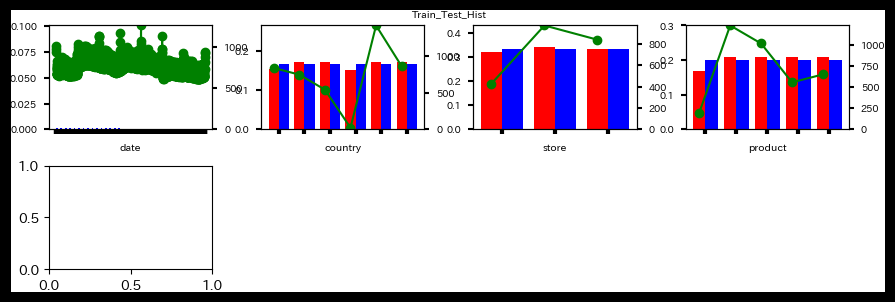

In [ ]:
trgt_y = 'num_sold'
# trgt_col = tr_df.columns
trgt_cols = []
tmp_tr, tmp_test, bin_values = cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_cols, row_num=5, col_num=4, bins=10, return_df=True)

# clean columns

In [ ]:
def clean_date(s):
    year, month, day = s.split("-")
    year = int(year)
    month = int(month)
    day = int(day)

    return year, month, day

tr_df[["year", "month", "day"]] = tr_df["date"].apply(clean_date).apply(pd.Series)
test_df[["year", "month", "day"]] = test_df["date"].apply(clean_date).apply(pd.Series)


def add_season(s):
    if s in [12, 1, 2]:
        s = "winter"
    elif s in [3, 4, 5]:
        s = "spring"
    elif s in [3, 4, 5]:
        s = "summer"
    else:
        s = "autumn"
    return s

def add_sin_cos_col(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

tr_df = add_sin_cos_col(tr_df, "month", 12)
test_df = add_sin_cos_col(test_df, "month", 12)
tr_df = add_sin_cos_col(tr_df,"day", 31)
test_df = add_sin_cos_col(test_df,"day", 31)

tr_df["season"] = tr_df["month"].apply(add_season).apply(pd.Series)
tr_df['weekday'] = pd.to_datetime(tr_df['date']).dt.dayofweek
test_df["season"] = test_df["month"].apply(add_season).apply(pd.Series)
test_df['weekday'] = pd.to_datetime(test_df['date']).dt.dayofweek
tr_df = tr_df.sort_values(by=["country", "store", "product", "year", "month", "day"], ascending=True).reset_index(drop=True)
test_df = test_df.sort_values(by=["country", "store", "product", "year", "month", "day"], ascending=True).reset_index(drop=True)

In [ ]:
_tr_df_1 = tr_df.copy()
_test_df_1 = test_df.copy()

In [ ]:
tr_df["lag_1_num_sold"] = tr_df.groupby(["country", "store", "product"])["num_sold"].shift(1)
tr_df["lag_7_num_sold"] = tr_df.groupby(["country", "store", "product"])["num_sold"].shift(7)
tr_df["lag_365_num_sold"] = tr_df.groupby(["country", "store", "product"])["num_sold"].shift(365)
tr_df["rolling_mean_num_sold_7"] = tr_df.groupby(["country", "store", "product"])["num_sold"].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
tr_df["rolling_mean_num_sold_30"] = tr_df.groupby(["country", "store", "product"])["num_sold"].transform(lambda x: x.rolling(window=30, min_periods=1).mean())
tr_df["rolling_mean_num_sold_365"] = tr_df.groupby(["country", "store", "product"])["num_sold"].transform(lambda x: x.rolling(window=365, min_periods=1).mean())

tr_df["lag_1_num_sold"] = tr_df["lag_1_num_sold"].fillna(tr_df["lag_1_num_sold"].mean())
tr_df["lag_7_num_sold"] = tr_df["lag_7_num_sold"].fillna(tr_df["lag_7_num_sold"].mean())
tr_df["lag_365_num_sold"] = tr_df["lag_365_num_sold"].fillna(tr_df["lag_365_num_sold"].mean())
tr_df["rolling_mean_num_sold_7"] = tr_df["rolling_mean_num_sold_7"].fillna(tr_df["rolling_mean_num_sold_7"].mean())
tr_df["rolling_mean_num_sold_30"] = tr_df["rolling_mean_num_sold_30"].fillna(tr_df["rolling_mean_num_sold_30"].mean())
tr_df["rolling_mean_num_sold_365"] = tr_df["rolling_mean_num_sold_365"].fillna(tr_df["rolling_mean_num_sold_365"].mean())


In [ ]:
# def add_sin_cos_col(df, col, max_val):
#     df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
#     df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
#     return df

# tr_df = add_sin_cos_col(tr_df, 'month', 12)
# test_df = add_sin_cos_col(test_df,d 'day', 31)

In [ ]:
def add_lags_test(inp_tr_df, inp_test_df, lag_col):
    tr_df = inp_tr_df.copy()
    test_df = inp_test_df.copy()
    a_df = tr_df.groupby(["country", "store", "product"])[f"{lag_col}"].agg(["mean", "std"]).reset_index(drop=True)
    b_df = tr_df[["country", "store", "product"]].drop_duplicates(ignore_index=True)
    c_df = pd.concat([a_df, b_df], axis=1)
    # print(c_df)
    # import pdb; pdb.set_trace()
    test_df = pd.merge(test_df, c_df, on=["country", "store", "product"], how="left")
    test_df["mean"] = test_df["mean"].fillna(test_df["mean"].mean())
    test_df["std"] = test_df["std"].fillna(test_df["mean"].mean())
    # print(test_df)
    # import pdb; pdb.set_trace()
    test_df[f"{lag_col}"] = test_df.apply(
        lambda row: np.random.normal(row["mean"], row["std"], size=1)[0], axis=1).apply(lambda x: round(abs(x)))
    test_df.drop(["mean", "std"], axis=1, inplace=True)
    return test_df

In [ ]:
# _test_df = test_df.copy()
# _tr_df = tr_df.copy()

In [ ]:
tr_df = _tr_df.copy()
test_df = _test_df.copy()

In [ ]:
for lag_col in ["lag_1_num_sold", "lag_7_num_sold", "lag_365_num_sold", "rolling_mean_num_sold_7", "rolling_mean_num_sold_30", "rolling_mean_num_sold_365"]:
    test_df = add_lags_test(tr_df, test_df, lag_col)

In [ ]:
def add_trgtencd(inp_tr_df, inp_test_df, grby_cols, trgt_col):

    # inp_tr_dfのkeyの結合
    if isinstance(grby_cols, str):
        grby_cols = [grby_cols]
    tr_df = inp_tr_df.copy()
    test_df = inp_test_df.copy()
    df = tr_df.groupby(grby_cols)[f"{trgt_col}"].mean()
    if len(grby_cols) > 0:
        grby_cols_key =   "_".join(grby_cols)
    else:
        grby_cols_key = grby_cols[0]
    df = df.rename(f"{grby_cols_key}_mean_{trgt_col}")
    df_index = df.index
    df_2 = pd.DataFrame(df.values, columns = [f"{grby_cols_key}_mean_{trgt_col}"])
    df_2["tmp_key"] = df_index
    df_2["tmp_key"] = df_2["tmp_key"].apply(lambda x: "_".join(list(x)))
    # print(grby_cols)
    # print(tr_df.keys)
    tr_df["tmp_key"] = tr_df[grby_cols].agg("_".join, axis=1)
    test_df["tmp_key"] = test_df[grby_cols].agg("_".join, axis=1)
    # print(df_2)
    # print(df.values)
    # import pdb; pdb.set_trace()
    tr_df = pd.merge(tr_df, df_2, on=["tmp_key"], how='left')
    test_df = pd.merge(test_df, df_2, on=["tmp_key"], how='left')
    tr_df[f"{grby_cols_key}_mean_{trgt_col}"] = tr_df[f"{grby_cols_key}_mean_{trgt_col}"].fillna(tr_df[f"{grby_cols_key}_mean_{trgt_col}"].mean())
    test_df[f"{grby_cols_key}_mean_{trgt_col}"] = test_df[f"{grby_cols_key}_mean_{trgt_col}"].fillna(test_df[f"{grby_cols_key}_mean_{trgt_col}"].mean())
    tr_df.drop("tmp_key", axis=1, inplace=True)
    test_df.drop("tmp_key", axis=1, inplace=True)

    return tr_df, test_df

In [ ]:
cate_cols = ["date", "country", "store", "product", "year", "month", "day", "season", "weekday"]
tr_df[cate_cols] = tr_df[cate_cols].astype("category")
test_df[cate_cols] = test_df[cate_cols].astype("category")

def cnvrt_cate_col_val(df, cate_cols):
    for col in cate_cols:
        df[col] = df[col].apply(lambda x: str(x) if not isinstance(x, str) else x)
    return df

tr_df = cnvrt_cate_col_val(tr_df, cate_cols)
test_df = cnvrt_cate_col_val(test_df, cate_cols)

In [ ]:
tr_df, test_df = add_trgtencd(tr_df, test_df, ["country", "store", "product"], "num_sold")

<ipython-input-9-eee980e65fd3>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = tr_df.groupby(grby_cols)[f"{trgt_col}"].mean()


In [ ]:
tr_df, test_df = add_trgtencd(tr_df, test_df, ["country", "store", "season"], "num_sold")

<ipython-input-9-eee980e65fd3>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = tr_df.groupby(grby_cols)[f"{trgt_col}"].mean()


In [ ]:
exp_id = 2
base_path = Path(f"/content/drive/MyDrive/kaggle/playground_s5e1/")
tmp_dir = base_path / "data/cleaned_data"
tmp_dir.mkdir(parents=True, exist_ok=True)
with open(base_path / f"data/cleaned_data/cleaned_tr_df_exp_{exp_id}.pickle", 'wb') as f:
    pickle.dump(tr_df, f)
with open(base_path / f"data/cleaned_data/cleaned_test_df_exp_{exp_id}.pickle", 'wb') as f:
    pickle.dump(test_df, f)

In [12]:
! python3 /content/drive/MyDrive/kaggle/playground_s5e1/utility/main.py 2

ストリーミング出力は最後の 5000 行に切り捨てられました。

///// now...level_1_xgbreg_local_study_2_fold_cv /////
★ level_1_xgbreg_LOCAL_TRIAL_1 strat...
[0]	validation_0-mae:75.82167	validation_1-mae:66.81565
[9]	validation_0-mae:54.86501	validation_1-mae:55.39689
loss____: 0.07690477615701145
[I 2025-02-19 06:42:12,370] Trial 0 finished with value: 0.07690477615701145 and parameters: {}. Best is trial 0 with value: 0.07690477615701145.
-------
0.07690477615701145
-------

///// now...level_1_xgbreg_local_study_3_fold_cv /////
★ level_1_xgbreg_LOCAL_TRIAL_1 strat...
[0]	validation_0-mae:73.80439	validation_1-mae:82.36919
[9]	validation_0-mae:53.77243	validation_1-mae:68.40461
loss____: 0.07299724941056963
[I 2025-02-19 06:42:12,422] Trial 0 finished with value: 0.07299724941056963 and parameters: {}. Best is trial 0 with value: 0.07299724941056963.
-------
0.07299724941056963
-------
///// now...level_1_xgbreg_local_study_all_done ! /////
[I 2025-02-19 06:42:12,502] Trial 0 finished with value: 0.0743368402237

In [ ]:
# base_path = Path('/content/drive/MyDrive/nishika/mansion_autumn_2024/')
run_id = 7
with open(base_path / f"output/exp/exp_1/run_{run_id}/tr_df.pickle", 'rb') as f:
    s_tr_df = pickle.load(f)

with open(base_path / f"output/exp/exp_1/run_{run_id}/test_df.pickle", 'rb') as f:
    s_test_df = pickle.load(f)

with open(base_path / f"output/exp/exp_1/run_{run_id}/output_path.pickle", 'rb') as f:
    output_path = pickle.load(f)

In [ ]:
from sklearn.metrics import mean_absolute_error

def eval_mae_score(tr_df, trgt_y):
    score = mean_absolute_error(tr_df[f"{trgt_y}"].values, tr_df[f"{trgt_y}_pred"].values)
    return score


trgt_y = "num_sold"
eval_mae_score(s_tr_df, trgt_y)

6.120566126467949

In [ ]:
row_sample_df

,0,1
0,id,num_sold
1,230130,100
2,230131,100
3,230132,100
4,230133,100
...,...,...
98546,328675,100
98547,328676,100
98548,328677,100
98549,328678,100


In [ ]:
s_test_df

,id,date,country,store,product,year,month,day,month_sin,month_cos,...,weekday,lag_1_num_sold,lag_7_num_sold,lag_365_num_sold,rolling_mean_num_sold_7,rolling_mean_num_sold_30,rolling_mean_num_sold_365,country_store_product_mean_num_sold,country_store_season_mean_num_sold,num_sold_pred
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose,2017,1,1,5.000000e-01,0.866025,...,6,374,675,154,905,411,325,741.765966,512.526108,878.743408
1,230220,2017-01-02,Canada,Discount Stickers,Holographic Goose,2017,1,2,5.000000e-01,0.866025,...,0,1374,450,5,287,1086,177,741.765966,512.526108,262.863129
2,230310,2017-01-03,Canada,Discount Stickers,Holographic Goose,2017,1,3,5.000000e-01,0.866025,...,1,3643,166,1137,134,1436,191,741.765966,512.526108,178.751526
3,230400,2017-01-04,Canada,Discount Stickers,Holographic Goose,2017,1,4,5.000000e-01,0.866025,...,2,984,322,267,858,1159,190,741.765966,512.526108,738.397461
4,230490,2017-01-05,Canada,Discount Stickers,Holographic Goose,2017,1,5,5.000000e-01,0.866025,...,3,412,935,228,399,1498,1196,741.765966,512.526108,375.567841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,328314,2019-12-27,Singapore,Stickers for Less,Kerneler Dark Mode,2019,12,27,-2.449294e-16,1.000000,...,4,958,906,764,1104,1024,891,867.225655,989.857911,1150.525269
98546,328404,2019-12-28,Singapore,Stickers for Less,Kerneler Dark Mode,2019,12,28,-2.449294e-16,1.000000,...,5,1097,864,714,907,918,903,867.225655,989.857911,994.942383
98547,328494,2019-12-29,Singapore,Stickers for Less,Kerneler Dark Mode,2019,12,29,-2.449294e-16,1.000000,...,6,755,658,748,775,925,854,867.225655,989.857911,987.433411
98548,328584,2019-12-30,Singapore,Stickers for Less,Kerneler Dark Mode,2019,12,30,-2.449294e-16,1.000000,...,0,1213,923,942,1010,1021,873,867.225655,989.857911,1180.111694


In [ ]:
row_sample_df[0][1]

'230130'

In [ ]:
def save_submit(output_path, trgt_df, trgt_y, row_sample_df):
    submit_df = row_sample_df.copy()
    submit_df = submit_df.drop(1, axis=1)
    exp_id = re.findall("exp_(\d)", str(output_path))[0]
    run_id = re.findall("run_(\d{1,3})", str(output_path))[0]
    save_path = output_path / f"submit_exp_{exp_id}_{run_id}.csv"

    df = trgt_df[["id", f"{trgt_y}_pred"]]
    df = df.rename(columns={"id": 0, f"{trgt_y}_pred": 1})
    df[0] = df[0].apply(lambda x: str(x))
    # df[0] = df[0].astype("object")
    # print(df[1])
    # df[1] = df[1].astype("object")
    # submit_df.drop("取引価格（総額）_log", axis=1, inplace=True)
    submit_df = pd.merge(submit_df, df, on=0, how="left")
    submit_df[1][0] = "num_sold"
    # submit_df[1] = df[f"{trgt_y}_pred_proba"].values
    submit_df.to_csv(save_path, encoding="shift_jis", index=False, header=False)
    return submit_df

save_submit(output_path, s_test_df, trgt_y, row_sample_df)

<ipython-input-47-ab8a2f8369aa>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submit_df[1][0] = "num_sold"
<ipython-input-47-ab8a2f8369aa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

,0,1
0,id,num_sold
1,230130,878.743408
2,230131,669.486145
3,230132,690.044434
4,230133,239.717728
...,...,...
98546,328675,303.93515
98547,328676,2258.800781
98548,328677,2027.406616
98549,328678,768.71698


In [ ]:
# a_df = tr_df.groupby(["country", "store", "product"])["lag_1_num_sold"].agg(["mean", "std"]).reset_index(drop=True)
# b_df = tr_df[["country", "store", "product"]].drop_duplicates(ignore_index=True)
# c_df = pd.concat([a_df, b_df], axis=1)

In [ ]:
# tr_df = pd.merge(tr_df, c_df, on=["country", "store", "product"], how="left")

In [ ]:
# test_df = pd.merge(test_df, c_df, on=["country", "store", "product"], how="left")

In [ ]:
# # test_df = pd.merge(test_df, c_df, on=["country", "store", "product"], how="left")
# test_df["mean"] = test_df["mean"].fillna(test_df["mean"].mean())
# test_df["std"] = test_df["std"].fillna(test_df["mean"].mean())
# test_df["lag_1_num_sold"] = test_df.apply(
#     lambda row: np.random.normal(row["mean"], row["std"]), axis=1).apply(lambda x: abs(x))

In [ ]:
# def tmp_f(df, trgt_col):
#     tmp_dfs = []
#     for x in df[f"{trgt_col}"].unique():
#         tmp_df = df[df[f"{trgt_col}"] == x].reset_index(drop=True)
#         tmp_dfs.append(tmp_df)
#     return tmp_dfs

# tmp_dfs = tmp_f(tr_df, "country")

# tmp_dfs_2 = []
# for df in tmp_dfs:
#     tmp_dfs_2.append(tmp_f(df, "store"))

# tmp_dfs_3 = []
# for dfs in tmp_dfs_2:
#     for df in dfs:
#         tmp_dfs_3.append(tmp_f(df, "product"))

# from itertools import chain

# tmp_dfs_4 = list(chain.from_iterable(tmp_dfs_3))

# tmp_dfs_5 = []

# def tmp_f(df, col, max_val):
#     df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
#     df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
#     return df

# for df in tmp_dfs_4:
#     df["num_sold_shift_1"] = df["num_sold"].shift(1)
#     df["num_sold_shift_7"] = df["num_sold"].shift(7)
#     df["num_sold_shift_365"] = df["num_sold"].shift(365)
#     df["rolling_mean_num_sold_7"] = df["num_sold"].rolling(window=7).mean()
#     df["rolling_mean_num_sold_30"] = df["num_sold"].rolling(window=30).mean()
#     df["rolling_mean_num_sold_365"] = df["num_sold"].rolling(window=365).mean()
#     df = tmp_f(df, 'month', 12)
#     df = tmp_f(df, 'day', 31)

#     tmp_dfs_5.append(df)

In [ ]:
def add_agg_feats(inp_df, grby_cols, trgt_col):
    df = inp_df.copy()
    df = df.groupby(grby_cols)[f"{trgt_col}"].mean()
    grby_cols_str =   "_".join()
    df = df.rename(f"{grby_col}_mean_{trgt_col}")
    inp_df = pd.merge(inp_df, df, left_on=[f"{grby_col}"], right_index=True, how='left')

    return inp_df

In [ ]:
def add_agg_feats(inp_df, grby_col, trgt_col):
    df = inp_df.copy()
    # test_df = inp_test_df.copy()
    df = df.groupby(grby_col)[f"{trgt_col}"].mean()
    df = df.rename(f"{grby_col}_mean_{trgt_col}")
    inp_df = pd.merge(inp_df, df, left_on=[f"{grby_col}"], right_index=True, how='left')

    return inp_df

tmp_dfs_6 = []
for inp_tr_df in tmp_dfs_5:
    df = add_agg_feats(inp_tr_df, "country", "num_sold")
    tmp_dfs_6.append(df)

In [ ]:
tmp_dfs_7 = []
for inp_tr_df in tmp_dfs_6:
    df = add_agg_feats(inp_tr_df, "store", "num_sold")
    tmp_dfs_7.append(df)

In [ ]:
tmp_dfs_8 = []
for inp_tr_df in tmp_dfs_7:
    df = add_agg_feats(inp_tr_df, "product", "num_sold")
    tmp_dfs_8.append(df)

In [ ]:
# def tmp_f(df, col, max_val):
#     df[col + '_sin'] = np.sin(2 * np.pi * df[col] / max_val)
#     df[col + '_cos'] = np.cos(2 * np.pi * df[col] / max_val)
#     return df

# tmp_dfs_6 = []
# for df in tmp_dfs_5:
#     df = tmp_f(df, 'month', 12)
#     df = tmp_f(df, 'day', 31)
#     tmp_dfs_6.append(df)

<Axes: xlabel='month_sin', ylabel='month_cos'>

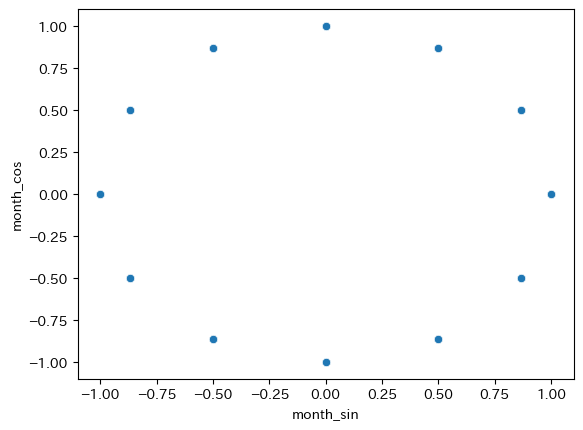

In [ ]:
import seaborn as sns

sns.scatterplot(x="month_sin", y="month_cos", data=tmp_dfs_6[0])

In [ ]:
tr_df_cp.country.unique()

array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
      dtype=object)

In [ ]:
tr_df

,id,date,country,store,product,num_sold,year,month,day,season,weekday
0,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,winter,4
1,91,2010-01-02,Canada,Discount Stickers,Kaggle,881.0,2010,1,2,winter,5
2,181,2010-01-03,Canada,Discount Stickers,Kaggle,1003.0,2010,1,3,winter,6
3,271,2010-01-04,Canada,Discount Stickers,Kaggle,744.0,2010,1,4,winter,0
4,361,2010-01-05,Canada,Discount Stickers,Kaggle,707.0,2010,1,5,winter,1
...,...,...,...,...,...,...,...,...,...,...,...
221254,229764,2016-12-27,Singapore,Stickers for Less,Kerneler Dark Mode,1016.0,2016,12,27,winter,1
221255,229854,2016-12-28,Singapore,Stickers for Less,Kerneler Dark Mode,1062.0,2016,12,28,winter,2
221256,229944,2016-12-29,Singapore,Stickers for Less,Kerneler Dark Mode,1178.0,2016,12,29,winter,3
221257,230034,2016-12-30,Singapore,Stickers for Less,Kerneler Dark Mode,1357.0,2016,12,30,winter,4


In [ ]:
import pandas as pd
import numpy as np
import datetime
import holidays

In [ ]:
country_hols = []
trgt_countries = ['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore']

for country in trgt_countries:
    for year in [2010, 2011, 2012, 2013, 2014, 2015, 2016]:
        hol = holidays.CountryHoliday(country, years=year)
        df_hol = pd.DataFrame(hol.items(), columns=['Date', 'Holiday'])
        df_hol["country"] = country
        country_hols.append(df_hol)

# country_hols = list(chain.from_iterable(country_hols))


In [ ]:
# https://zenn.dev/mkymdk/articles/053083e53c8caa
# https://pypi.org/project/holidays/

# import pandas as pd
# import numpy as np
# import datetime
# import holidays

# # year年の日本の祝日を取得
# jp_holidays = holidays.CountryHoliday('JP', years=year)

# # year年の土曜日と日曜日の日付を取得
# start = str(year) + '-01-01'
# end = str(year) + '-12-31'
# weekend_dates = pd.date_range(start, end, freq='W-SAT') | \
#                pd.date_range(start, end, freq='W-SUN')

# # 祝日と土日の日付を結合
# dns = list(jp_holidays.keys()) + list(weekend_dates)

# # データフレームを作成
# df = pd.DataFrame({'date': dns}).drop_duplicates().sort_values('date').reset_index()
# df.drop('index', axis=1, inplace=True)

In [ ]:
def tmp_f(inp_df, grby_col, trgt_col):
    df = inp_df.copy()
    tmp_df = df.groupby(grby_col)[trgt_col].mean().rename(f"{grby_col}_mean_{trgt_col}")
    df = pd.merge(df, tmp_df, left_on=[f"{grby_col}"], right_index=True, how='left')
    # df = pd.merge(df, tmp_df, left_on=grby_col, right_index=True, how="left")
    return df

tmp_f(tr_df, "product", "num_sold")

,id,date,country,store,product,num_sold,year,month,day,product_mean_num_sold
0,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,1232.384587
1,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1,1018.344110
2,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1,556.913102
3,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1,651.042021
4,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1,197.484363
...,...,...,...,...,...,...,...,...,...,...
221254,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,12,31,197.484363
221255,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,12,31,1232.384587
221256,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,31,1018.344110
221257,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,12,31,556.913102


In [ ]:
tr_df[tr_df.count == "Discount Stickers"]

,id,date,country,store,product,num_sold,year,month,day
0,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
1,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
2,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
3,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1
14,15,2010-01-01,Finland,Discount Stickers,Holographic Goose,150.0,2010,1,1
...,...,...,...,...,...,...,...,...,...
221244,230115,2016-12-31,Singapore,Discount Stickers,Holographic Goose,200.0,2016,12,31
221245,230116,2016-12-31,Singapore,Discount Stickers,Kaggle,1259.0,2016,12,31
221246,230117,2016-12-31,Singapore,Discount Stickers,Kaggle Tiers,931.0,2016,12,31
221247,230118,2016-12-31,Singapore,Discount Stickers,Kerneler,556.0,2016,12,31


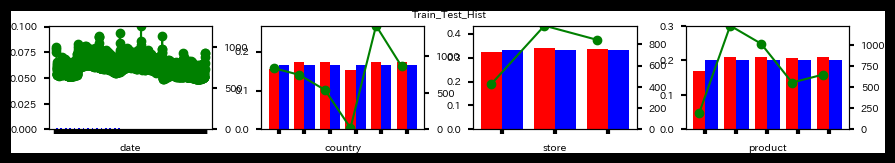

In [ ]:
trgt_y = 'num_sold'
trgt_cols = [
     'date', 'country', 'store', 'product']

bin_values = cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_cols, row_num=5, col_num=4, bins=12, return_df=False)

In [ ]:
trgt_y = 'date'
trgt_col = ["age"]
_tr_df, _test_df, bin_values = cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=10, return_df=True)

In [ ]:
trgt_y = 'prodtaken'
trgt_col = ["age"]
_tr_df, _test_df, bin_values = cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=10, return_df=True)

In [ ]:
trgt_y = 'prodtaken'
trgt_col = ["age"]
_tr_df, _test_df, bin_values = cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=10, return_df=True)

In [ ]:
trgt_y = 'prodtaken'
trgt_col = ["age"]
_tr_df, _test_df, bin_values = cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=10, return_df=True)

In [ ]:
tr_df

,id,date,country,store,product,num_sold,year,month,day
0,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
1,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
2,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
3,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1
4,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1
...,...,...,...,...,...,...,...,...,...
221254,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,12,31
221255,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,12,31
221256,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,31
221257,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,12,31


# 集約特徴量

In [ ]:
_del_cols = ["typeofcontact", "citytier", "occupation", "gender", "numberofpersonvisiting",
            "numberoffollowups", "productpitched", "preferredpropertystar",
            "numberoftrips", "passport", "pitchsatisfactionscore", "designation",
            "is_married", "has_car", "has_child"]

del_cols = []

for col in _del_cols:
    col = f"binned_{col}"
    del_cols.append(col)
_tr_df = _tr_df.drop(del_cols, axis=1)
_test_df = _test_df.drop(del_cols, axis=1)

In [ ]:
cate_cols = ["numberofpersonvisiting", "numberoffollowups", "preferredpropertystar",
             "numberoftrips", "passport", "pitchsatisfactionscore",
             "prodtaken", "is_married", "has_car", "has_child"]

def cnvrt_cate(df, cate_cols):
    for col in df.columns:
        if col in cate_cols:
            df = df.astype({f"{col}": "category"})
        else:
            pass
    return df


_tr_df = cnvrt_cate(_tr_df, cate_cols)
_test_df = cnvrt_cate(_test_df, cate_cols)

def cnvrt_cate(df):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype("category")
        else:
            pass
    return df

_tr_df = cnvrt_cate(_tr_df)
_test_df = cnvrt_cate(_test_df)

In [ ]:
def make_agg_feats(inp_df):
    df = inp_df.copy()
    grby_cols = df.columns
    trgt_cols = df.columns
    grby_cols = [col for col in grby_cols if col not in ["id", "prodtaken"]]
    trgt_cols = [col for col in trgt_cols if col not in ["id", "prodtaken"]]

    for grby_col in grby_cols:
        if df[grby_col].dtype == "category":
            for trgt_col in trgt_cols:
                if trgt_col in ["passport", "is_marrie", "has_car", "has_child", f"{grby_col}"]:
                    continue;

                if df[trgt_col].dtype == "category":
                    tmp_df = df.groupby(df[grby_col], observed=False)[f"{trgt_col}"].apply(lambda x: x.mode()[0])
                    tmp_df = tmp_df.rename(f"grby_{grby_col}_mode_{trgt_col}")
                    # print(tmp_df)
                    # import pdb; pdb.set_trace()

                if df[trgt_col].dtype in ["int64", "float64"]:
                    tmp_df = df.groupby(f"{grby_col}", observed=False)[f"{trgt_col}"].apply(lambda x: x.mean())
                    tmp_df = tmp_df.rename(f"grby_{grby_col}_mean_{trgt_col}")
                    # print(tmp_df)
                    # import pdb; pdb.set_trace()

                df = pd.merge(df, tmp_df, left_on=[f"{grby_col}"], right_index=True, how='left')
    return df

_tr_df_2 = make_agg_feats(_tr_df)
_test_df_2 = make_agg_feats(_test_df)

In [ ]:
def cnvrt_cate(df):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype("category")
        else:
            pass
    return df

tr_df = cnvrt_cate(tr_df)
test_df = cnvrt_cate(test_df)

In [ ]:
exp_id = 1

base_path = Path('/content/drive/MyDrive/signate/signate_cup_2024/')
tmp_dir = base_path / "data/cleaned_data"
tmp_dir.mkdir(parents=True, exist_ok=True)
with open(base_path / f"data/cleaned_data/cleaned_tr_df_exam_{exp_id}.pickle", 'wb') as f:
    pickle.dump(tr_df, f)
with open(base_path / f"data/cleaned_data/cleaned_test_df_exam_{exp_id}.pickle", 'wb') as f:
    pickle.dump(test_df, f)

In [ ]:
# xgb_singleでs_n_trials: 1000, epochs: 1000
# exp_id = 1
# run_id = 1
! python3 /content/drive/MyDrive/signate/signate_cup_2024/utility/main.py 1

# /改定

## 各ラベルの詳細

In [ ]:
def get_binned_data(x, col, bins=10, label_format='{:02}_{:.0f}-{:.0f}'):

    # データ型チェック
    if type(x) not in (pd.Series, pd.DataFrame):
        x = pd.Series(x)

    if x.isnull().values.any():
        print(col)
        print(x.unique())
        raise ValueError(f"{col}にNaNが含まれています。NaNを削除してください。")

    uniq_type = type(x[0])

    # ラベルが文字型の場合
    if uniq_type is str:
        binned_x = x
        return binned_x

    # ラベルが数字でunique数が10未満の場合は、文字型に変換する
    if len(x.unique()) < 10:
        binned_x = pd.Series([str(val) for val in x])
    else:
        if type(bins) is int:
            binned_value, bin_def = pd.qcut(x, bins, retbins=True, duplicates='drop')
        else:
            bin_def = bins


        labels = [label_format.format(i, bin_def[i], bin_def[i+1]) for i in range(len(bin_def)-1)]

        if type(bins) is int:
            binned_x = pd.qcut(x, bins, labels=labels, duplicates='drop')
        else:
            binned_x = pd.cut(x, bins, labels=labels)

        binned_x = pd.Series([str(val) for val in binned_x])

    return binned_x

def meta_subplots(row_num, col_num=3):
    dpi = 100
    fig_x = 10
    fig_y = 8

    if row_num * col_num == 1:
        dpi = 70
        fig_x = 5
        fig_y = 5

    if row_num * col_num == 1:
        dpi = dpi
        fig_x = fig_x
        fig_y = fig_y
    elif row_num * col_num <= 3:
        dpi = dpi*1.25
        fig_x = fig_x*1.25
        fig_y = fig_y*1.25

    elif row_num * col_num <= 6:
        dpi = dpi*1.5
        fig_x = fig_x*1.5
        fig_y = fig_y*1.5

    elif row_num * col_num <= 9:
        dpi = dpi*1.75
        fig_x = fig_x*1.75
        fig_y = fig_y*1.75

    elif row_num * col_num <= 12:
        dpi = dpi*2
        fig_x = fig_x*2
        fig_y = fig_y*2


    fig, axes = plt.subplots(row_num, col_num ,dpi = dpi,
    facecolor = "white",
    edgecolor = "black",
    linewidth= 15,
    figsize=(fig_x, fig_y))
    return fig, axes

def cnvrt_hist_encd(tr_df, test_df, trgt_y, trgt_cols, row_num, col_num, bins=10, return_encd=False, show_fig=True):
    bin_values = {}

    tr_df_lc = tr_df.copy()
    test_df_lc = test_df.copy()
    fig, axes = meta_subplots(row_num, col_num)
    if row_num * col_num > 1:
        axes = axes.flatten()
    if len(trgt_cols) > 0:
        cols = trgt_cols.copy()
    else:
        cols = tr_df.columns

    if "id" in cols:
        cols = [col for col in cols if col != "id"]


    # print(len(cols))
    # import pdb; pdb.set_trace()
    for i, col in enumerate(cols):
        print(col)
        if i == len(cols):
            break;
        if col == trgt_y:
            continue;
        # ビン分割
        tr_endid = tr_df_lc.index[-1]
        all_df_lc = pd.concat([tr_df_lc, test_df_lc], ignore_index=True)

        all_values = all_df_lc[col]

        all_binned_values = get_binned_data(all_values, col, bins)

        all_df_lc["binned_label"] = all_binned_values.values
        tr_binned_values = all_binned_values[:tr_endid+1]
        test_binned_values = all_binned_values[tr_endid+1:]

        # カテゴリごとに件数を集計
        tr_plot_data = pd.DataFrame({"train_val_rate": tr_binned_values.value_counts() / tr_df_lc.shape[0]})
        test_plot_data = pd.DataFrame({"test_val_rate": test_binned_values.value_counts() / test_df_lc.shape[0]})
        all_plot_data = pd.DataFrame({"all_val_n": all_binned_values.value_counts()})

        # 全体カテゴリのindexに合わせる
        tr_plot_data = pd.concat([all_plot_data, tr_plot_data], axis=1, sort=True)
        tr_plot_data.drop(["all_val_n"], axis=1, inplace=True)
        tr_plot_data = tr_plot_data.fillna(0)
        test_plot_data = pd.concat([all_plot_data, test_plot_data], axis=1, sort=True)
        test_plot_data.drop(["all_val_n"], axis=1, inplace=True)
        test_plot_data = test_plot_data.fillna(0)


        if col != trgt_y:
            tmp_df = all_df_lc[[col, "binned_label"]].copy()
            #y_rate_dfはtrまでのデータ
            y_rate_df = all_df_lc[[col, trgt_y, "binned_label"]][:tr_endid+1].copy()
            y_rate_df[trgt_y] = y_rate_df[trgt_y].apply(lambda x: int(x) if not pd.isna(x) else x)

            # tmp_df = y_rate_df.copy()

            # .loc[: trgt]で置換すると強制的にcategory型になる！！！
            y_rate_df[trgt_y] = y_rate_df[trgt_y].astype('float64')
            y_rate_df = y_rate_df.groupby("binned_label")[trgt_y].mean().reset_index()
            y_rate_df.rename(columns={f"{trgt_y}": f"{trgt_y}_rate"}, inplace=True)
            y_rate_df.set_index("binned_label", inplace=True)
            tr_plot_data = pd.merge(tr_plot_data, y_rate_df, left_index=True, right_index=True, how='left')
            tr_plot_data[f"{trgt_y}_rate"] = tr_plot_data[f"{trgt_y}_rate"].fillna(0)


        w = 0.4

        x_axis_labels = [i for i in range(len(tr_plot_data.index.tolist()))]


        if row_num * col_num > 1:
            ax = axes[i]
        else:
            ax = axes

        ax_tr_dict = tr_plot_data[["train_val_rate"]].to_dict()["train_val_rate"]
        ax_test_dict = test_plot_data[["test_val_rate"]].to_dict()["test_val_rate"]

        ax2_tr_dict = tr_plot_data[[f"{trgt_y}_rate"]].to_dict()[f"{trgt_y}_rate"]

        ax.bar(x_axis_labels, ax_tr_dict.values(), width=w, color='red')

        plt_test_x = test_plot_data.index.tolist()
        tmp_plt_test_x = [i for i in range(len(plt_test_x))]
        tmp_plt_test_x = [int(x)+ w for x in tmp_plt_test_x]

        ax.bar(tmp_plt_test_x, ax_test_dict.values(), width=w, color='blue')

        plot_label_x = list(ax_tr_dict.keys())
        tmp_plot_label_x = [i for i in range(len(plot_label_x))]
        tmp_plot_label_x = [int(x)+ w/2 for x in tmp_plot_label_x]
        bin_values[col] = plot_label_x

        ax.set_xticks(tmp_plot_label_x)
        ax.set_xticklabels(plot_label_x, rotation=30)

        ax.xaxis.set_tick_params(direction='out', labelsize=7, width=3, pad=3)
        upper_y = test_plot_data["test_val_rate"].max() + 0.1
        ax.set_ylim([0, upper_y])
        ax.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)

        ax.set_xlabel(f"{col}", fontsize=7.5)

        # ax.axes.xaxis.set_visible(False)
        ax.axes.xaxis.set_ticklabels([])


        ax2 = ax.twinx()
        ax2.plot(x_axis_labels, ax2_tr_dict.values(), marker='o', color='g')
        ax2.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)
        upper_y =tr_plot_data[f"{trgt_y}_rate"].max() + 0.1
        ax2.set_ylim([0, upper_y])
        ax2.set_ylabel("")



    fig.suptitle("Train_Test_Hist", fontsize=7.5, y=0.95)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.93, wspace=0.3, hspace=0.35)

    if row_num * col_num > 1:
        for i in range(len(cols), len(axes.flatten())):
                fig.delaxes(axes.flatten()[i])
    if not show_fig:
        plt.close(fig)
    if return_encd and (len(trgt_cols) == 1):
        # return ax2_tr_dict
        # return (tmp_df, ax2_tr_dict)
        tmp_df_2 = pd.DataFrame(list(ax2_tr_dict.items()), columns=["binned_label", f"encded_{col}"])
        # print(tmp_df_2)
        # import pdb; pdb.set_trace()
        tmp_df = pd.merge(tmp_df, tmp_df_2, on='binned_label', how='left').drop("binned_label", axis=1).drop_duplicates().reset_index(drop=True)
        # tmp_tr_df = tmp_df[:tr_endid+1]
        # tmp_test_df = tmp_df[tr_endid+1:]
        # print(tmp_df)
        # import pdb; pdb.set_trace()
        # return_tr_df = tr_df.copy()
        # return_test_df = test_df.copy()
        return_tr_df= pd.merge(tr_df.copy(), tmp_df, on=col, how="left")
        return_test_df = pd.merge(test_df.copy(), tmp_df, on=col, how="left")
        # import pdb; pdb.set_trace()
        # return tmp_tr_df, tmp_test_df
        # plt.close(fig)
        return return_tr_df, return_test_df
    else:
        return None

# def cnvrt_nan(df):
#     df.

In [ ]:
# cnvrt_hist_encd(tr_df, test_df, trgt_y, trgt_cols, row_num, col_num, bins=10, return_encd=False, show_fig=True):

pref
house_layout
building_struct
building_use
future_use
urban_plan
tx_date
reno


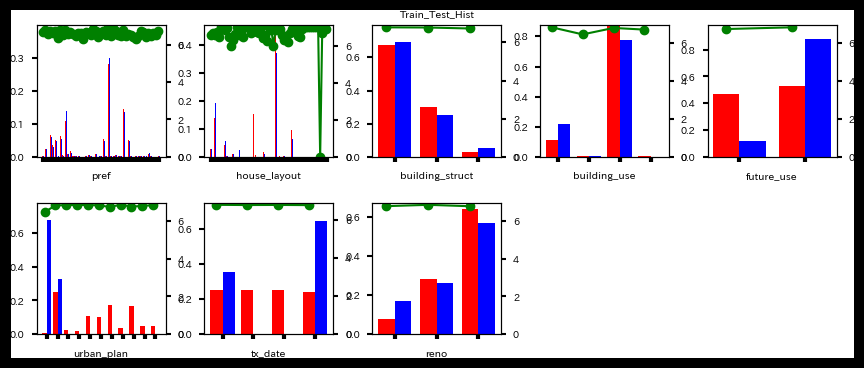

In [ ]:
trgt_y = "log_price"
object_cols = []
for col in tr_df:
    if tr_df[col].dtype == "O":
        object_cols.append(col)


cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=object_cols, row_num=4, col_num=5, bins=10)

station_dist
area
bc_ratio
fa_ratio
log_price
layout_l
layout_d
layout_k
layout_s
building_age


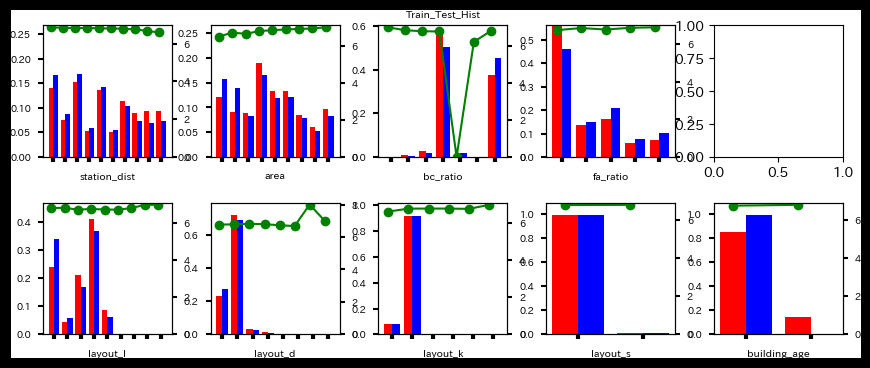

In [ ]:
trgt_y = "log_price"
not_object_cols = []
for col in tr_df:
    if tr_df[col].dtype != "O":
        not_object_cols.append(col)


cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=not_object_cols, row_num=4, col_num=5, bins=10)

In [ ]:
def check_na(inp_df):
    df = inp_df.copy()
    for col in df.keys():
        global tmp_df
        print(col)
        tmp_lst = list(df[col].unique())
        tmp_df = pd.DataFrame(tmp_lst)

        if tmp_df.isna().any()[0]:
            print("NaNあり")
            n_nan= df[col].isna().sum()
            print(f"NaNは{n_nan}個あります。")
        else:
            print("NaNなし")
        print("------------------\n")


def check_and_clean_na(inp_df, fill_na=False):
    df = inp_df.copy()
    for col in df.keys():
        global tmp_df
        print(col)
        tmp_lst = list(df[col].unique())
        tmp_df = pd.DataFrame(tmp_lst)

        if tmp_df.isna().any()[0]:
            print("NaNあり")
            if fill_na:
                df[col] = df[col].fillna(df[col].mean())
            else:
                df = df.dropna(subset=[col])
        else:
            print("NaNなし")
        print("------------------\n")

    return df

In [ ]:
tr_df[object_cols] = tr_df[object_cols].astype("category")
test_df[object_cols] = test_df[object_cols].astype("category")

## pythonファイル

In [ ]:
# base_path = Path('/content/drive/MyDrive/nishika/mansion_autumn_2024/')
# with open(base_path / "output/exp/exp_1/run_1/meta_tr_df.pickle", 'rb') as f:
#     meta_tr_df = pickle.load(f)

# with open(base_path / "output/exp/exp_1/run_1/meta_test_df.pickle", 'rb') as f:
#     meta_test_df = pickle.load(f)

# with open(base_path / "output/exp/exp_1/run_1/output_path.pickle", 'rb') as f:
#     output_path = pickle.load(f)

AUC:  0.9478772632833459


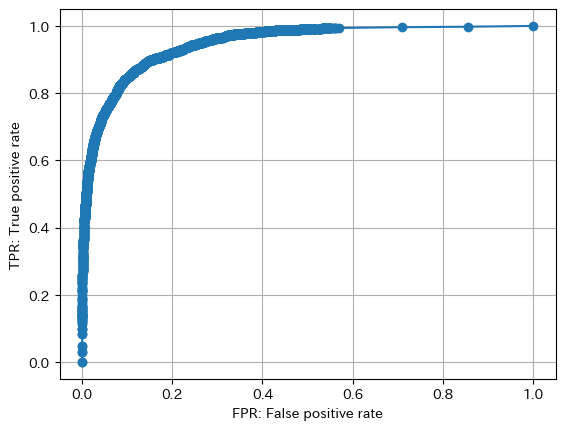

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc(meta_tr_df, meta_test_df, trgt_y):
    y_true = meta_tr_df[f"{trgt_y}"]
    y_score = meta_tr_df[f"{trgt_y}_pred_proba"]
    auc_score = roc_auc_score(y_true, y_score)
    fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)

    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.grid()

    return auc_score
auc_score = plot_roc(meta_tr_df, meta_test_df, "y")
print("AUC: ", auc_score )

In [ ]:
str(output_path)

'/content/drive/MyDrive/signate/beginner_no52/output/exp/exp_1/run_1'

In [ ]:
# import re
# # tmp = re.findall("exp_.*", str(output_path))[0]
# # tmp_1, tmp_2 = tmp.split("/")
# re.findall("exp_(\d)", str(output_path))[0]
# re.findall("run_(\d)", str(output_path))[0]

'1'

In [ ]:
def save_submit(output_path, trgt_df, trgt_y, row_sample_df):
    submit_df = row_sample_df.copy()
    exam_id = re.findall("exp_(\d)", str(output_path))[0]
    run_id = re.findall("run_(\d)", str(output_path))[0]
    df = trgt_df[["id", f"{trgt_y}_pred_proba"]]
    save_path = output_path / f"submit_exam_{exam_id}_{run_id}.csv"
    submit_df[1] = df[f"{trgt_y}_pred_proba"].values
    submit_df.to_csv(save_path, encoding="shift_jis", index=False, header=None)
    return submit_df

save_submit(output_path, meta_test_df, "y", row_sample_df)

,0,1
0,0,0.837638
1,1,0.050738
2,2,0.053655
3,3,0.022578
4,4,0.023180
...,...,...
18045,18045,0.022578
18046,18046,0.022578
18047,18047,0.171839
18048,18048,0.022578


## けさない

In [ ]:
def eval_score(inp_df, trgt_y, threshold):
    df = inp_df.copy()
    df[f"{trgt_y}_pred"] = df[f"{trgt_y}_pred_proba"].apply(lambda x: 1 if x >= threshold else 0)
    # print(df)
    tp_tn = df[df[f"{trgt_y}"] == df[f"{trgt_y}_pred"]].shape[0]
    total_n = df.shape[0]
    print(tp_tn / total_n)

    from sklearn.metrics import f1_score
    f1_value = f1_score(df[f"{trgt_y}"], df[f"{trgt_y}_pred"])
    print("f1スコア：", f1_value)

    return df

meta_tr_df_2 = ens_clsfs.meta_tr_df.copy()
meta_test_df_2 = ens_clsfs.meta_test_df.copy()
trgt_y = "prodtaken"
threshold = 0.5
meta_tr_df_2 = eval_score(meta_tr_df_2, trgt_y, threshold)
meta_test_df_2[f"{trgt_y}_pred"] = meta_test_df_2[f"{trgt_y}_pred_proba"].apply(lambda x: 1 if x >= threshold else 0)

0.970991890205864
f1スコア： 0.8934707903780069


In [ ]:
meta_tr_df_2.head()

,id,xgbclsf_pred_proba,lgbclsf_pred_proba,catclsf_pred_proba,prodtaken,prodtaken_pred_proba,prodtaken_pred
0,0,0.985692,0.492196,0.487579,1,0.972457,1
1,1,0.007039,0.090785,0.192115,0,0.000080,0
2,3,0.017048,0.108343,0.146098,0,0.000418,0
3,4,0.269322,0.286567,0.350988,1,0.284993,0
4,5,0.395655,0.424208,0.394830,0,0.246800,0


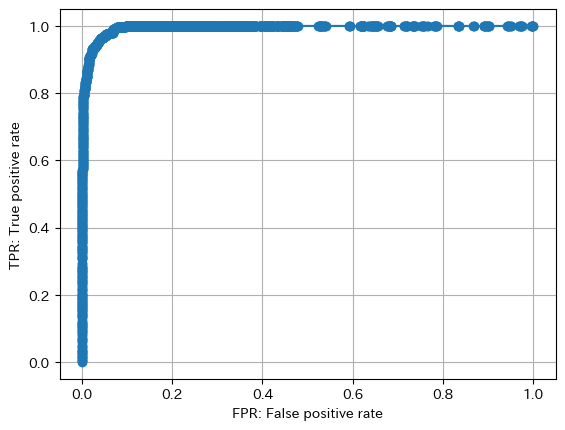

In [ ]:
from sklearn.metrics import roc_curve
y_true = meta_tr_df_2.prodtaken
y_score = meta_tr_df_2.prodtaken_pred_proba
fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

In [ ]:
def save_submit(ens_clsfs, base_path, sample_submit_df):
    submit_df = sample_submit_df.copy()
    trgt_y = ens_clsfs.trgt_y
    df = ens_clsfs.meta_test_df
    df = df[["id", f"{trgt_y}_pred_proba"]]
    trgt_ymd = ens_clsfs.trgt_ymd
    exam_id = ens_clsfs.exam_id
    base_path = base_path
    save_dir = base_path / f'save/save_submit/{trgt_ymd}'
    if not save_dir.exists():
        save_dir.mkdir(parents=True, exist_ok=True)

    study_exam_dir = save_dir / f'exam_no_{exam_id}'
    study_exam_dir.mkdir(parents=True, exist_ok=True)

    save_path = study_exam_dir / f"submit_{trgt_ymd}_{exam_id}.csv"
    submit_df[1] = df[f"{trgt_y}_pred_proba"].values
    submit_df.to_csv(save_path, encoding="shift_jis", index=False, header=None)
    return submit_df

In [ ]:
df = save_submit(ens_clsfs, base_path, row_sample_df)

In [ ]:
df

,0,1
0,3489,0.001541
1,3490,0.023104
2,3491,0.178151
3,3492,0.919114
4,3493,0.013959
...,...,...
3484,6973,0.013914
3485,6974,0.000537
3486,6975,0.948080
3487,6976,0.058842


In [ ]:
row_sample_df = pd.read_csv("/content/drive/MyDrive/signate/signate_cup_2024/data/sample_submit.csv", header=None)
row_sample_df

,0,1
0,3489,0.119451
1,3490,0.343575
2,3491,0.119451
3,3492,0.119451
4,3493,0.119451
...,...,...
3484,6973,0.119451
3485,6974,0.119451
3486,6975,0.119451
3487,6976,0.119451


In [ ]:
row_sample_df[1] = df[1]

,id,age,citytier,durationofpitch,gender,numberofpersonvisiting,numberoffollowups,preferredpropertystar,numberoftrips,passport,pitchsatisfactionscore,monthlyincome,is_married,has_car,has_child,occupation_encd,typeofcontact_encd,productpitched_encd,designation_encd
0,3489,48.0,2,780.0,0,1.0,4.0,3.0,7.0,0,3,496950.0,1,1,0,0.16,0.12,0.09,0.08
1,3490,30.0,2,720.0,1,1.0,4.0,3.0,4.0,1,3,300000.0,1,0,0,0.16,0.12,0.09,0.09
2,3491,25.0,1,540.0,1,1.0,4.0,3.0,1.0,0,3,260000.0,0,0,0,0.10,0.12,0.30,0.31
3,3492,21.0,2,420.0,0,1.0,4.0,4.0,1.0,0,3,259875.0,0,0,0,0.10,0.18,0.30,0.09
4,3493,41.0,1,420.0,0,1.0,4.0,3.0,1.0,0,4,268830.0,0,1,0,0.10,0.18,0.30,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,6973,41.0,1,840.0,1,1.0,3.0,3.0,2.0,0,4,261840.0,1,0,0,0.16,0.18,0.30,0.31
3485,6974,44.0,1,2100.0,0,3.0,5.0,3.0,3.0,0,3,349770.0,1,0,1,0.10,0.18,0.03,0.04
3486,6975,24.0,2,1260.0,0,2.0,3.0,3.0,2.0,0,3,270000.0,0,0,0,0.16,0.12,0.30,0.31
3487,6976,25.0,1,540.0,0,2.0,3.0,3.0,2.0,0,3,272430.0,1,0,1,0.16,0.12,0.30,0.31


In [ ]:
ens_clsfs.meta_tr_df

,id,xgbclsf_pred,lgbclsf_pred,catclsf_pred,prodtaken,prodtaken_pred
0,0,1.0,1.0,0.0,1,1.0
1,1,0.0,0.0,0.0,0,0.0
2,3,0.0,0.0,0.0,0,0.0
3,4,1.0,0.0,0.0,1,1.0
4,5,1.0,1.0,0.0,0,1.0
...,...,...,...,...,...,...
3201,3484,1.0,0.0,0.0,1,1.0
3202,3485,0.0,0.0,0.0,0,0.0
3203,3486,0.0,0.0,0.0,0,0.0
3204,3487,1.0,0.0,0.0,1,1.0


In [ ]:
row_sample_df

,0,1
0,3489,0.119451
1,3490,0.343575
2,3491,0.119451
3,3492,0.119451
4,3493,0.119451
...,...,...
3484,6973,0.119451
3485,6974,0.119451
3486,6975,0.119451
3487,6976,0.119451


In [ ]:
row_sample_df

,0,1
0,3489,0.119451
1,3490,0.343575
2,3491,0.119451
3,3492,0.119451
4,3493,0.119451
...,...,...
3484,6973,0.119451
3485,6974,0.119451
3486,6975,0.119451
3487,6976,0.119451


In [ ]:
row

In [ ]:
df.prodtaken_pred.value_counts()

,count
prodtaken_pred,
0,3086
1,109


In [ ]:
tr_df

,id,age,citytier,durationofpitch,gender,numberofpersonvisiting,numberoffollowups,preferredpropertystar,numberoftrips,passport,pitchsatisfactionscore,monthlyincome,prodtaken,is_married,has_car,has_child,occupation_encd,typeofcontact_encd,productpitched_encd,designation_encd
0,0,50.0,2,900.0,0,1.0,4.0,3.0,5.0,1,4,253905.0,1,0,0,0,0.23,0.12,0.30,0.31
1,1,56.0,1,840.0,0,1.0,4.0,3.0,2.0,1,4,404475.0,0,0,0,0,0.10,0.18,0.09,0.09
3,3,37.0,2,1080.0,1,1.0,3.0,4.0,1.0,0,5,326805.0,0,0,1,0,0.16,0.12,0.09,0.09
4,4,48.0,3,1020.0,1,1.0,3.0,4.0,4.0,0,4,258435.0,1,0,1,0,0.16,0.18,0.30,0.31
5,5,19.0,2,960.0,0,1.0,3.0,3.0,2.0,0,4,260000.0,0,0,0,0,0.16,0.12,0.30,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3484,40.0,2,1560.0,0,2.0,3.0,3.0,3.0,0,1,258900.0,1,0,1,0,0.10,0.12,0.30,0.31
3485,3485,40.0,1,540.0,0,3.0,3.0,5.0,5.0,0,3,260415.0,0,1,1,0,0.23,0.12,0.30,0.31
3486,3486,31.0,1,840.0,1,3.0,2.0,3.0,5.0,0,4,317340.0,0,0,1,1,0.16,0.12,0.09,0.09
3487,3487,56.0,2,900.0,0,3.0,6.0,3.0,7.0,1,4,527910.0,1,1,0,0,0.10,0.18,0.06,0.06


In [ ]:
meta_tr_df = ens_clsfs.meta_tr_df.copy()
meta_test_df = ens_clsfs.meta_test_df.copy()

In [ ]:
meta_tr_df.columns

Index(['id', 'xgbclsf_pred', 'lgbclsf_pred', 'catclsf_pred', 'attrition',
       'attrition_pred'],
      dtype='object')

In [ ]:
meta_tr_df[meta_tr_df["attrition"] == meta_tr_df["attrition_pred"]].shape[0]

1198

In [ ]:
meta_tr_df.shape[0]

1200

In [ ]:
meta_test_df

,id,xgbclsf_pred,lgbclsf_pred,catclsf_pred,attrition_pred
49,113,1.0,0.000000,0.000000,1.0
174,427,1.0,0.000000,0.000000,1.0
185,452,1.0,0.000000,0.000000,1.0
213,517,1.0,0.000000,0.000000,1.0
226,536,1.0,0.000000,0.000000,1.0
256,597,1.0,0.000000,0.000000,1.0
298,711,1.0,0.000000,0.000000,1.0
317,759,1.0,0.000000,0.000000,1.0
346,831,1.0,0.000000,0.000000,1.0
350,841,1.0,0.000000,0.000000,1.0


In [ ]:
ens_clsfs.exam_id

3

In [ ]:
ens_clsfs.trgt_ymd

'2024_10_8'

In [ ]:
# def save_results(df, exam_id, exam_year, exam_month, exam_day):
def save_submit(ens_clsfs, base_path):
    df = ens_clsfs.meta_test_df
    df = df[["id", "attrition_pred"]]
    df["attrition_pred"] = df["attrition_pred"].apply(lambda x: int(x))
    df = df.rename(columns={"id": 1, "attrition_pred": 0})
    trgt_ymd = ens_clsfs.trgt_ymd
    exam_id = ens_clsfs.exam_id
    # base_path = Path('/content/drive/MyDrive/nishika/mansion_spring_2024')
    # trgt_ymd = f'{exam_year}_{exam_month}_{exam_day}'
    base_path = base_path
    save_dir = base_path / f'save/save_submit/{trgt_ymd}'
    if not save_dir.exists():
        save_dir.mkdir(parents=True, exist_ok=True)
    # 自動でidを振るには工夫がいる
    # exam_id = len(list(save_dir.iterdir()))+1
    # ptrn = re.compile(r'(\d{1,3})')
    # max_id = 0
    # for iter in save_dir.iterdir():
    #     tmp_lst = ptrn.findall(str(iter))
    #     tmp_id = tmp_lst[-1]
    #     if not tmp_id.isdigit():
    #         continue;
    #     tmp_id = int(tmp_id)
    #     if tmp_id > max_id:
    #         max_id = tmp_id
    # exam_id = max_id + 1
    # exam_id = exam_id
    study_exam_dir = save_dir / f'exam_no_{exam_id}'
    study_exam_dir.mkdir(parents=True, exist_ok=True)
    # save_path = study_exam_dir / f"submit.pkl"
    # with open(save_path, "wb") as f:
    #     pickle.dump(df, f)
    save_path = study_exam_dir / f"submit_{trgt_ymd}_{exam_id}.csv"
    df.to_csv(save_path, encoding="shift_jis", index=False)
    return df

In [ ]:
save_submit(ens_clsfs, base_path)

<ipython-input-75-1110d0f60ba2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["attrition_pred"] = df["attrition_pred"].apply(lambda x: int(x))


,1,0
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
795,1991,0
796,1992,0
797,1993,0
798,1995,0


In [ ]:
save_results(sample_df, ens_regs.exam_id, ens_regs.exam_year,
             ens_regs.exam_month, ens_regs.exam_day)

In [ ]:
def save_submit_csv(submit_df):
    base_path = Path('/content/drive/MyDrive/nishika/mansion_winter_2023')
    save_study_dir = base_path / 'save/save_study'
    tmp_lst = [child for child in save_study_dir.iterdir() if child.is_dir()]
    tmp_lst = list(map(lambda x: x.parts[-1], tmp_lst))
    tmp_lst = sorted(tmp_lst, key=lambda x: tuple(map(int, x.split('_'))), reverse=True)
    latest_date = tmp_lst[0]
    latest_date_dir = save_study_dir / latest_date
    ptrn = re.compile(r'(\d{1,3})')
    max_id = 0
    for iter in latest_date_dir.iterdir():
        tmp_lst = ptrn.findall(str(iter))
        tmp_id = tmp_lst[-1]
        if not tmp_id.isdigit():
            continue;
        tmp_id = int(tmp_id)
        if tmp_id > max_id:
            max_id = tmp_id
    exam_id = max_id
    exam_id_path = latest_date_dir / str(exam_id)
    # print(latest_date)
    save_dir = base_path / f'save/save_submit/{latest_date}/exam_no_{exam_id}'
    save_dir.mkdir(parents=True, exist_ok=True)
    file_name =  f'{latest_date}_{exam_id}.csv'
    save_path = save_dir / file_name
    submit_csv = submit_df.to_csv(save_path, encoding="shift_jis", index=False)

In [ ]:
optuna.trial.Trial.suggest_categorical(f'hidden_dim_1', [10, 100])

In [ ]:
import sklearn
print(f'Scikit-learn version: {sklearn.__version__}')